In [1]:
import numpy as np
from pathlib import Path, PurePath #manejo de rutas y archivos
import matplotlib.pyplot as plt #gráficos
from scipy.interpolate import griddata #interpolación

#Graficación
#plt.prop_cycle(color=['0C5DA5', '00B945', 'FF9500', 'FF2C00', '845B97'])

#Graficación
#idioma = 'español'
idioma = 'ingles'


if idioma == 'español':
    #plt.prop_cycle(color=['0C5DA5', '00B945', 'FF9500', 'FF2C00', '845B97'])
    #axes.prop_cycle : cycler('color', ['0C5DA5', '00B945', 'FF9500', 'FF2C00', '845B97', '474747', '9e9e9e'])
    #Latex y coma como separador decimal
    plt.rcParams['text.usetex'] = True #latex
    #plt.rc('text', usetex=False)
    plt.rcParams['axes.formatter.use_locale'] = True #formato de eje para la coma
    #se incluye paquete matematico útil, se corrige el error con el espacio y el espacio entre los números
    plt.rc('text.latex', preamble=r'\usepackage{pifont} \usepackage{amsmath} \DeclareUnicodeCharacter{202F}{\,} \usepackage{ziffer} \usepackage{siunitx}') 
    plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Helvetica"
    })
    import locale #líbreria para el formato
    locale.setlocale(locale.LC_ALL, "es_CR.utf8")

if idioma == 'ingles' :
    plt.rc('text.latex', preamble=r'\usepackage{pifont} \usepackage{amsmath} \usepackage{siunitx}')
    plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Helvetica"
    })


import locale #líbreria para el formato
locale.setlocale(locale.LC_ALL, "es_CR.utf8")


'es_CR.utf8'

### Gráfico porcentaje de conversión - Escenario 02
1. Generar el test.###
2. Copiar el tes.### en la carpeta y concatenarlos con cat test.out.22032 test.out.22053 test.out.22054 test.out.22055 > total.txt
3. Correr ox_conversion_todos_final.sh para catalogar los datos y ordenarlos. Esto genera resultados_ordenados.txt
4. Correr la función grafico_ox

In [2]:
def separar_datos_por_ancho(archivo, W0) :
    ruta_archivo = PurePath(Path(archivo)) #archivo txt
    pol, tor, w0, R = np.loadtxt(ruta_archivo, delimiter='\t', skiprows=1, usecols=(0, 1, 2, 3), unpack=True )
    
    #Identifica índice que cumple R < 1
    indices = np.where( (R<1) & (W0 == w0) )
    indices_1 = np.where( (R<1) ) 
    #Nuevas matrices
    pol = pol[indices]
    R = R[indices]
    tor = tor[indices]
    w0 = w0[indices_1]
    return pol, tor, R, w0

El ángulo poloidal que produce el máximo es 0.608695652173914
El ángulo toroidal que produce el máximo es 0.08695652173912904
12.519945484123888


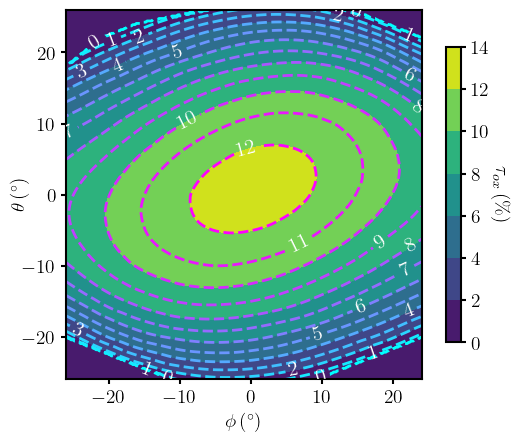

In [3]:
def mapa_ox(archivo, W0):
    #Variables filtradas
    pol, tor, R, w0 = separar_datos_por_ancho(archivo, W0)
    
    #Malla
    grid_tor, grid_pol = np.mgrid[np.min(tor):np.max(tor):300j, np.min(pol):np.max(pol):300j] #malla
    #Pares ordenados para interpolación
    par_angulos_total = np.stack((tor,pol), axis=1)
    from scipy.interpolate import griddata #interpolación 2
    ox_final = griddata(par_angulos_total, (1-R)*100  , (grid_tor, grid_pol), method='cubic', fill_value = 0)
    nivel = np.arange(np.min(ox_final), np.max(ox_final), (1))
    
    #Encontrar posición máxima
    maximo_ox = np.max(ox_final) #encontrar el máximo
    ind_max = np.where(ox_final == maximo_ox)
    print("El ángulo poloidal que produce el máximo es", grid_pol[ind_max][0])
    print("El ángulo toroidal que produce el máximo es", grid_tor[ind_max][0])
    #print(grid_pol[ind_max[0]])
    print(maximo_ox)
    
    contorno_ang = plt.contourf(ox_final.T,  extent=(np.min(tor), np.max(tor), np.min(pol),np.max(pol)))
    plt.ylabel(r'$ \theta \left( \si{\degree} \right) $', 
                  fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'}, labelpad = -5)
    plt.xlabel(r'$ \phi \left( \si{\degree} \right) $',  
                  fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'})
    plt.tick_params(axis='both', labelsize=14, width=1.5)
    lineas = plt.contour(ox_final.T, levels=nivel, extent=(np.min(tor), np.max(tor), np.min(pol),np.max(pol)), 
                         linestyles=('--',),linewidths=(2,), cmap="cool")
    ac = plt.colorbar(contorno_ang, orientation='vertical', shrink=0.8)
    ac.set_label(r' $\tau_{ox}\left( \si{\percent} \right)$', rotation=270, 
                  fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'}, labelpad=15) #labelpad - alejar
    ac.ax.tick_params(labelsize=14, width=1.5)
    plt.clabel(lineas, inline=True,  colors = 'white', fontsize=15) #contour line labels
    plt.gca().set_aspect("equal")
    ax = plt.gca()
    plt.setp(ax.spines.values(), linewidth=1.5)
    ac.outline.set_linewidth(1.5) #ancho del borde de la barra
    #plt.savefig('pol_tor_conversion1.png', dpi=300, bbox_inches='tight')
    
mapa_ox('B=0.95B0/resultados_ancho_total_050607.txt', 0.7)
#mapa_ox('B=1.00B0/resultados_ancho_total_050607.txt', 0.7)
#mapa_ox('B=1.05B0/resultados_ancho_total_050607.txt', 0.7)

B=0.975B0/resultados_ancho_total_020304.txt
0 0
0 1
0 2
1.8700036789297703
B=0.975B0/resultados_ancho_total_050607.txt
1 0
9.51275719063545
1 1
12.255320401337794
se guardó color
1 2
12.861829096989972
B=0.975B0/resultados_ancho_total_080910.txt
2 0
12.631397993311042
2 1
12.085003344481606
2 2
11.352415050167227


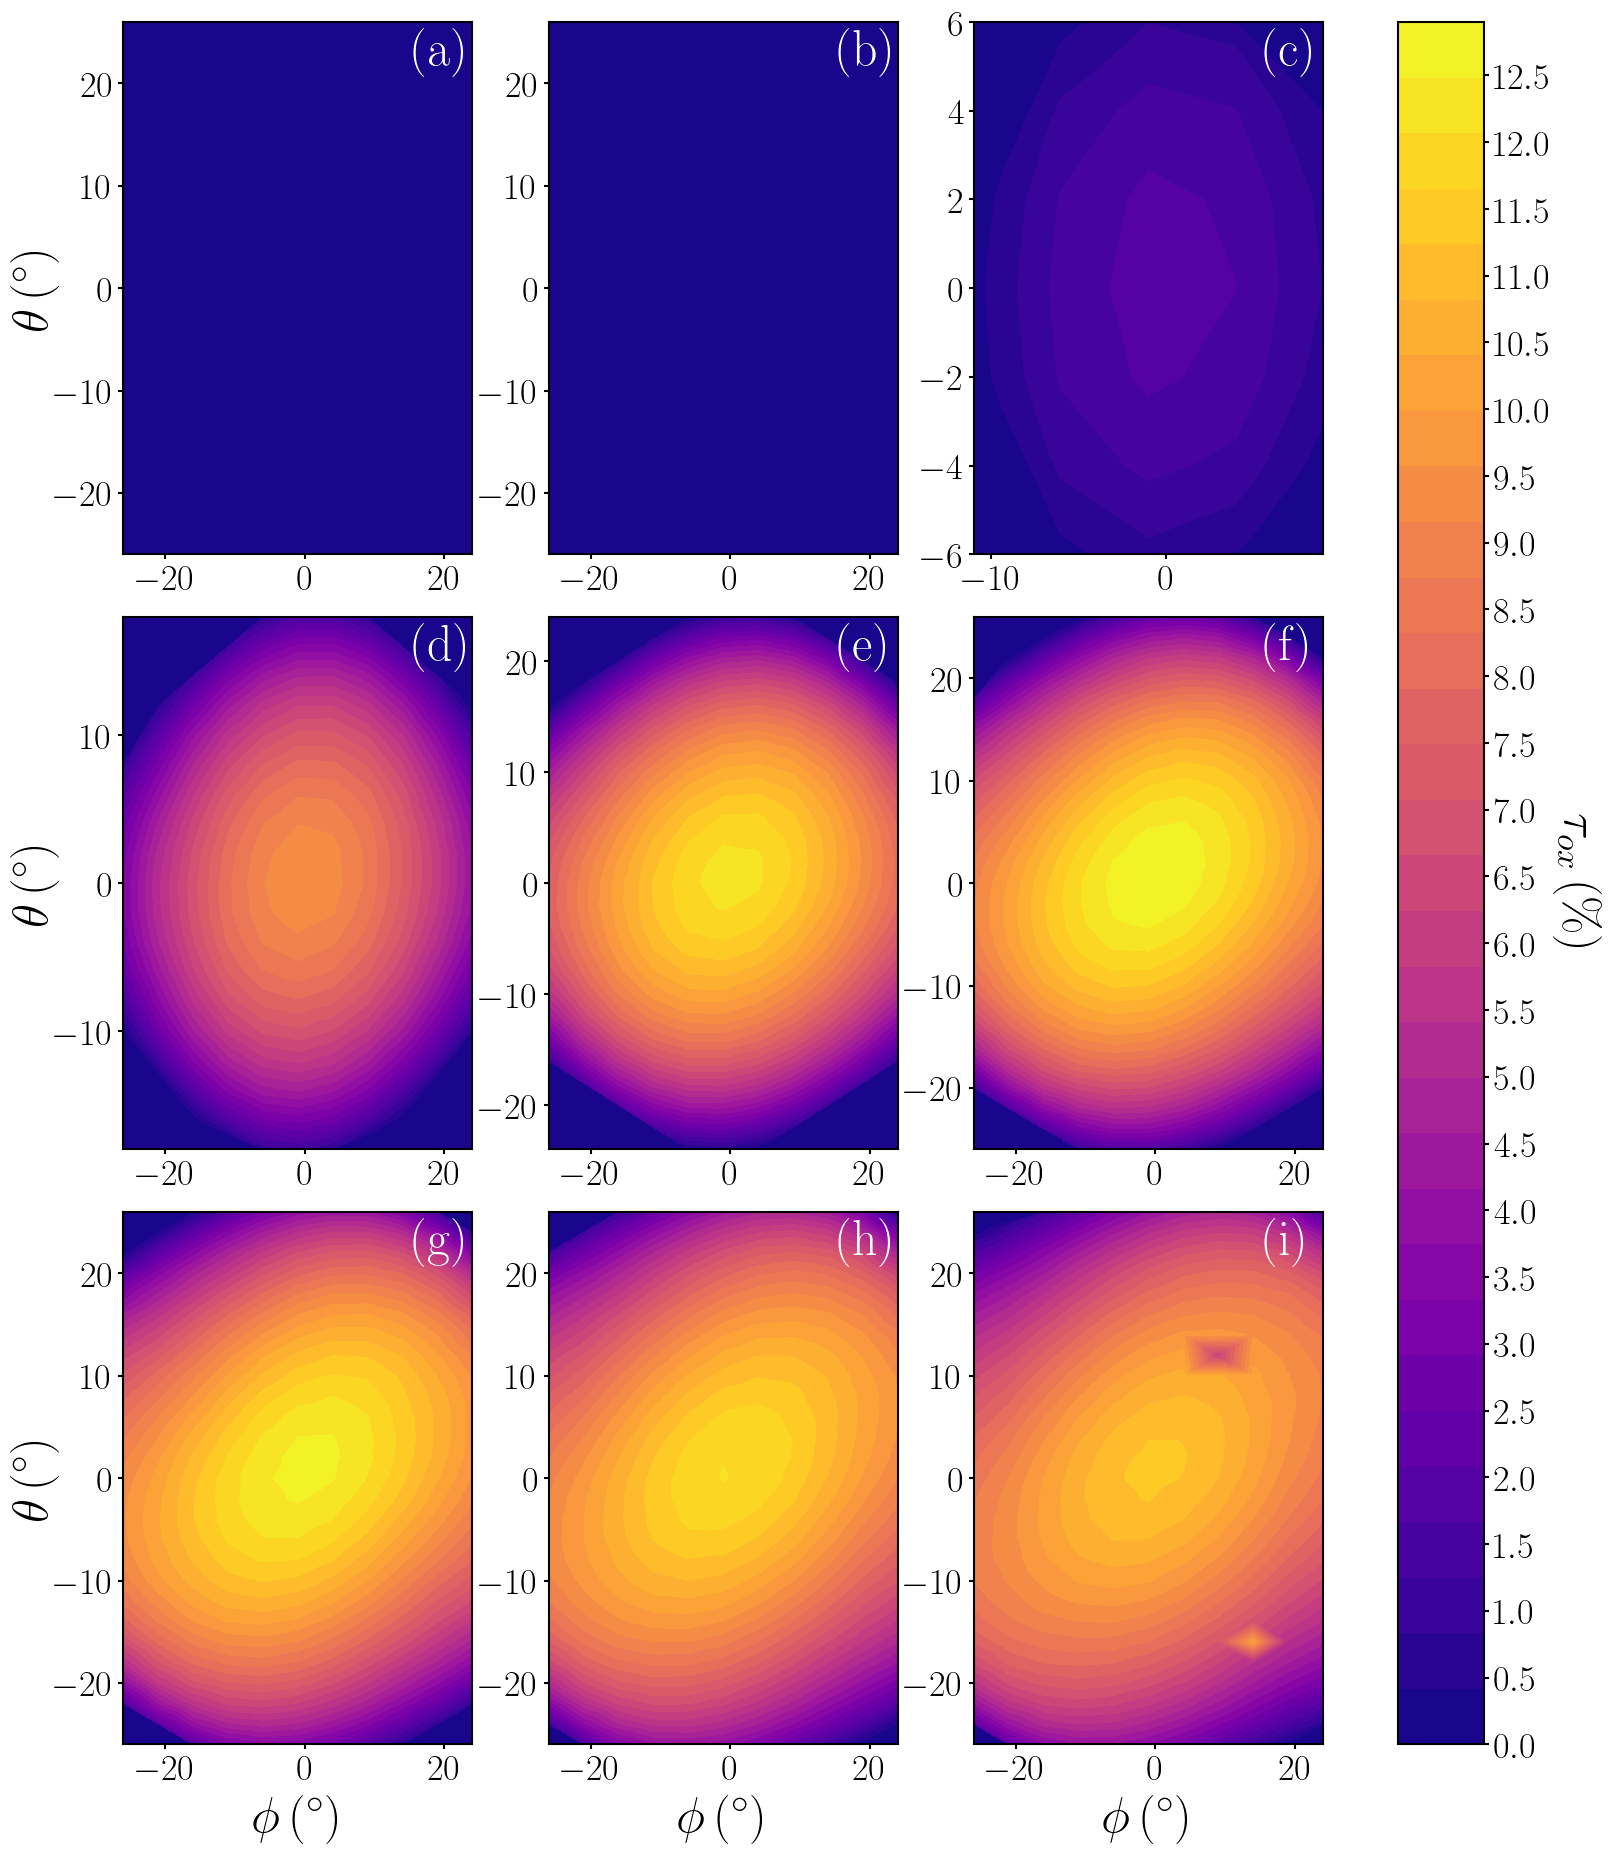

In [4]:
#Falta ajustar tamaños de letra para 100%
def mapas_ox(ruta) :
    from scipy.interpolate import griddata #interpolación 2
    import os #manejo de archivos
    archivos_PC = os.listdir(ruta) #directorio con archivos de porcentaje de conversión
    archivos_PC.sort() #acomoda en órden alfabético
    fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(16,18)) #crear grid de plots
    cont_1 =0
    color_levels = np.linspace(start=0, stop=12.9, num=32) #uniformizar colores B=B0
    #color_levels = np.linspace(start=0, stop=6.24, num=32) #uniformizar colores B=2B0
    cmap= 'plasma'
    letras = np.array([[r'$\textrm{(a)}$', r'$\textrm{(b)}$', r'$\textrm{(c)}$'],
                   [r'$\textrm{(d)}$', r'$\textrm{(e)}$', r'$\textrm{(f)}$'],
                   [r'$\textrm{(g)}$', r'$\textrm{(h)}$', r'$\textrm{(i)}$']])
    for iArchivo in archivos_PC:
        ruta_archivo = PurePath(Path(ruta), Path(iArchivo))
        print(ruta_archivo)
        pol, tor, w0, R = np.loadtxt(ruta_archivo, delimiter='\t', skiprows=1, usecols=(0, 1, 2, 3), unpack=True)
        ancho = np.unique(w0)[:-1] #se elimina el último indice 
        for i in range(0,3) :
            #Identifica índices que cumplen la condición R < 1
            indices = np.where( (R<1) & (ancho[i] == w0) )
            
            if np.any(indices) == False : #chequear matriz vacía en numpy
                #print("matriz vacía")
                par_angulos_total = np.stack((tor,pol), axis=1)
                grid_tor, grid_pol = np.mgrid[-26:26:300j, -26:26:300j] #malla
                ox_final = griddata(par_angulos_total, 0*np.ones(R.shape[0]) , 
                                    (grid_tor, grid_pol), method='cubic', fill_value = 0)
                ax[cont_1, i].contourf(ox_final.T,  extent=(np.min(tor), np.max(tor), np.min(pol),np.max(pol)),
                                      levels = color_levels, cmap=cmap) 
                ax[cont_1, i].tick_params(axis='both', labelsize=26, width=1.5)
                plt.setp(ax[cont_1, i].spines.values(), linewidth=1.5)
                ax[cont_1, i].text(0.83,0.92, letras[cont_1][i], fontsize =36, 
                         fontdict=None, color='white', transform=ax[cont_1,i].transAxes ) #Etiquetar gráfica
                print(cont_1, i)
                #continue
            else: 
                pol1 = pol[indices]
                R1 = R[indices]
                tor1 = tor[indices]
                
                #Pares ordenados para interpolación
                par_angulos_total1 = np.stack((tor1,pol1), axis=1)
                grid_tor1, grid_pol1 = np.mgrid[np.min(tor1):np.max(tor1):300j, np.min(pol1):np.max(pol1):300j] #malla
                ox_final = griddata(par_angulos_total1, (1-R1)*100  , (grid_tor1, grid_pol1), method='linear', fill_value = 0)
                ax[cont_1, i].contourf(ox_final.T,  extent=(np.min(tor1), np.max(tor1), np.min(pol1),np.max(pol1)), 
                                       levels = color_levels, cmap=cmap)
                ax[cont_1, i].tick_params(axis='both', labelsize=26, width=1.5)
                plt.setp(ax[cont_1, i].spines.values(), linewidth=1.5)
                ax[cont_1, i].text(0.83,0.92, letras[cont_1][i], fontsize =36, 
                         fontdict=None, color='white', transform=ax[cont_1,i].transAxes ) #Etiquetar gráfica
                if cont_1 == 1 and i == 2 :
                    color = ax[cont_1, i].contourf(ox_final.T,  extent=(np.min(tor1), np.max(tor1), np.min(pol1),np.max(pol1)), 
                                       levels = color_levels, cmap=cmap)
                    print("se guardó color")
                
                print(cont_1, i)
                print(np.max(ox_final.T))
        
        cont_1 += 1
    #color = ax[2, 1].contourf(ox_final.T,  extent=(np.min(tor1), np.max(tor1), np.min(pol1),np.max(pol1)), 
                              #levels = color_levels)
    #cax = fig.add_axes([0.95, 0.05, 0.04, 1])
    
    fig.tight_layout()
    #plt.gca().set_aspect("equal")
    #plt.subplots_adjust(hspace=-0.8) #ajustar el espacio entre subplots
    cbar = fig.colorbar(color, ax=ax, orientation='vertical')
    cbar.set_ticks(np.arange(0,12.9,0.5)) #B=B0
    #cbar.set_ticks(np.arange(0,6.25,0.5)) #B=2B0
    cbar.set_label(r'$ \tau_{ox} \left(  \si{\percent} \right)$',  
                  fontdict = {'fontsize':36, 'fontweight':'bold', 'color':'black'}, rotation=270, labelpad=35)
    cbar.ax.tick_params(labelsize=26, width=1.5)
    cbar.outline.set_linewidth(1.5) #ancho del borde de la barra
    
    ax[0,0].set_ylabel(r'$ \theta \left( \si{\degree} \right)$', 
                  fontdict = {'fontsize':36, 'fontweight':'bold', 'color':'black'}, labelpad = -5)
    ax[1,0].set_ylabel(r'$ \theta \left( \si{\degree} \right)$', 
                  fontdict = {'fontsize':36, 'fontweight':'bold', 'color':'black'}, labelpad = -5)
    ax[2,0].set_ylabel(r'$ \theta \left( \si{\degree} \right)$', 
                  fontdict = {'fontsize':36, 'fontweight':'bold', 'color':'black'}, labelpad = -5)
    ax[2,2].set_xlabel(r'$ \phi \left( \si{\degree} \right)$', 
                  fontdict = {'fontsize':36, 'fontweight':'bold', 'color':'black'}, labelpad = 5)
    ax[2,1].set_xlabel(r'$ \phi \left( \si{\degree} \right)$', 
                  fontdict = {'fontsize':36, 'fontweight':'bold', 'color':'black'}, labelpad = 5)
    ax[2,0].set_xlabel(r'$ \phi \left( \si{\degree} \right)$', 
                  fontdict = {'fontsize':36, 'fontweight':'bold', 'color':'black'}, labelpad = 5)
    #plt.savefig('pol_tor_conversion.png', dpi=300, bbox_inches='tight')
#mapas_ox('B=0.95B0')
mapas_ox('B=0.975B0')
#mapas_ox('B=1.05B0')
#mapas_ox('B=1.025B0')
#mapas_ox('B=1.00B0')
#https://www.youtube.com/watch?v=KlamVPFcl48

## Notas

Se grafica la eficiencia máxima para cada variable con el fin de identificar si hay coincidencia con la eficiencia máxima de todos los parámetros. Identificar si existe correlación entre los cuatro parámetros de la eficiencia (toroidal, poloidal, z y ancho)

Gráfico de tau vs ancho
https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.UnivariateSpline.html#scipy.interpolate.UnivariateSpline

matriz vacía
matriz vacía
El ancho que produce el tau máximo es [0.7] y el valor de tau máximo es [12.87808309]
12.519945484123888 [0.7]
matriz vacía
matriz vacía


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


El ancho que produce el tau máximo es [0.7] y el valor de tau máximo es [13.37170253]
13.011060581029563 [0.7]
matriz vacía
matriz vacía
El ancho que produce el tau máximo es [0.7] y el valor de tau máximo es [12.65735239]
12.303455308694588 [0.7]


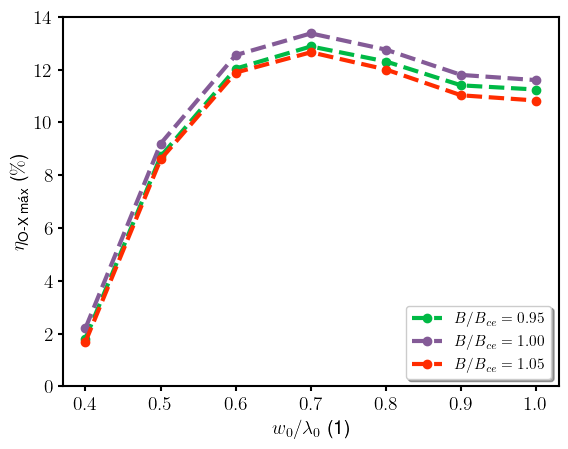

In [8]:
#grafico de tau vs ancho
def tau_vs_ancho(ruta, color, r) : 
    import os #manejo de archivos
    tau = []
    w0_total = []
    archivos_PC = os.listdir(ruta) #directorio con archivos de porcentaje de conversión
    archivos_PC.sort() #acomoda en órden alfabético
    for iArchivo in archivos_PC:
        #se obtiene la ruta del archivo
        ruta_archivo = PurePath(Path(ruta), Path(iArchivo))
        pol, tor, w0, R = np.loadtxt(ruta_archivo, delimiter='\t', skiprows=1, usecols=(0, 1, 2, 3), unpack=True)
        ancho = np.unique(w0)[:-1] #se elimina el último indice no deseado
        for i in range(0,3) :
            #Identifica índices que cumplen la condición R < 1
            indices = np.where( (R<1) & (ancho[i] == w0) )
            if np.any(indices) == False : #chequear matriz vacía en numpy
                print("matriz vacía")
                pass
            else: 
                pol1 = pol[indices]
                R1 = R[indices]
                tor1 = tor[indices]
                #print(np.max(R1))
                #Pares ordenados para interpolación
                par_angulos_total = np.stack((tor1,pol1), axis=1)
                grid_tor, grid_pol = np.mgrid[np.min(tor1):np.max(tor1):300j, np.min(pol1):np.max(pol1):300j] #malla
                ox_final = griddata(par_angulos_total, (1-R1)*100  , (grid_tor, grid_pol), method='cubic', fill_value = 0)
                tau.append(np.max(ox_final).tolist()) 
                tau_final = np.array(tau)
                w0_total.append(np.array(ancho[i]).tolist())
                w0_total_final = np.array(w0_total)         
    
    #Interpolación 1D
    from scipy.interpolate import UnivariateSpline
    f =  UnivariateSpline(w0_total_final, tau_final, )
    w0_inter = np.arange(np.min(w0_total_final), np.max(w0_total_final)+0.1,0.1)
    tau_inter = f(w0_inter)
    def find_nearest12(array,value):
        idx = np.searchsorted(array, value, side="right")-1 #Encuentra el valor más cercano en una matriz
        return idx
    #indice = find_nearest12(tau_inter, np.round(np.max(tau_inter), r))
    indice = np.where(tau_inter == np.max(tau_inter))
    print('El ancho que produce el tau máximo es', w0_inter[indice], "y el valor de tau máximo es", tau_inter[indice] )
    
    
    #gráfico
    plt.plot(w0_inter, tau_inter, 'o--', linewidth=3, color= color, label = 'datos originales')
    #plt.plot(w0_total_final, tau_final, 'o-', linewidth=3, color= color, label = 'datos originales')
    plt.xlabel(r'$w_0/\lambda_0$ (1)', fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'})
    plt.ylabel( r'$ \eta_{\text{O-X máx}}$ (\si{\percent})', fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'})
    plt.tick_params(axis='both', labelsize=14, width=1.5)
    #plt.legend((r'$B/B_{prom} = \num{0.95}, \eta_{\text{O-X máx}} =\num{12.5} $', r'$ B/B_{prom} = \num{1.00}, \eta_{\text{O-X máx}} =\num{13.0} $', r'$ B/B_{prom} = \num{1.05}, \eta_{\text{O-X máx}} =\num{12.3} $'), loc='lower right', fontsize=11,  ncol=1, fancybox=True, shadow=True)
    plt.legend((r'$B/B_{ce} = \num{0.95}$', r'$ B/B_{ce} = \num{1.00} $', r'$ B/B_{ce} = \num{1.05} $'), loc='lower right', fontsize=11,  ncol=1, fancybox=True, shadow=True)
    ax = plt.gca() #https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.gca.html
    plt.setp(ax.spines.values(), linewidth=1.5)
    plt.ylim(0, 14.0)
    
    indice1 = np.where(tau_final == np.max(tau_final))
    print(np.max(tau_final), w0_total_final[indice1])

#ruta, color redondeo (cantidad de decimales)
tau_vs_ancho('B=0.95B0', '#00B945', 1)
#tau_vs_ancho('B=0.975B0', 'orange', 1)
tau_vs_ancho('B=1.00B0', '#845B97', 1)
#tau_vs_ancho('B=1.025B0', 'black', 1)
tau_vs_ancho('B=1.05B0', '#FF2C00', 1)
#plt.savefig('tau_vs_ancho_B.png', dpi=300, bbox_inches='tight')
if idioma == 'español':
    plt.savefig('tau_vs_ancho_B.png', dpi=300, bbox_inches='tight') 
if idioma == 'ingles' :
    plt.savefig('tau_vs_ancho_B.eps', format='eps', dpi=300, bbox_inches='tight') #paper IOP

El ángulo poloidal que produce el máximo es 0.608695652173914
El ángulo toroidal que produce el máximo es 0.08695652173912904
12.519945484123888
El ángulo poloidal que produce el máximo es 0.608695652173914
El ángulo toroidal que produce el máximo es -0.24749163879598512
13.011060581029563
El ángulo poloidal que produce el máximo es 0.608695652173914
El ángulo toroidal que produce el máximo es 0.42140468227424677
12.303455308694588


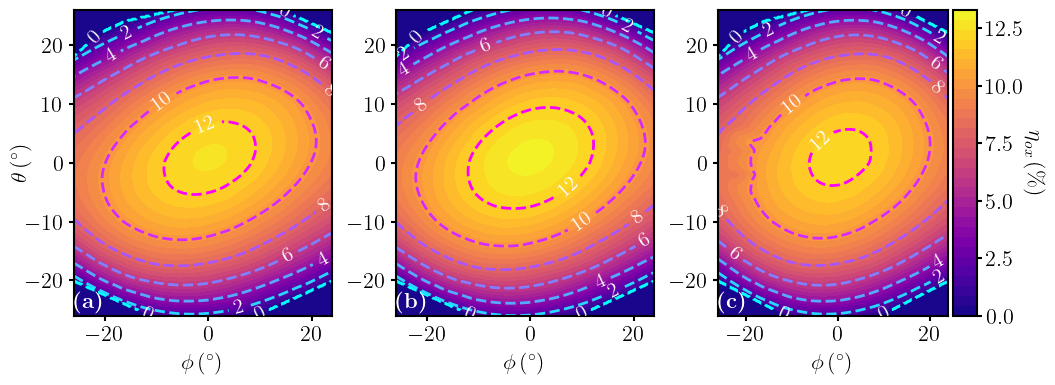

In [9]:
#Mejorar plot en cuanto escalas correctas
def mapa_ox_densidades_distintas(W0):
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10,4)) #crear grid de plots
    color_levels = np.linspace(start=0, stop=13.3, num=32)    #uniformizar colores 
    rutas = np.array(['B=0.95B0/resultados_ancho_total_050607.txt', 
                      'B=1.00B0/resultados_ancho_total_050607.txt',
                      'B=1.05B0/resultados_ancho_total_050607.txt'])
    letras = np.array([r'$\textrm{(a)}$', r'$\textrm{(b)}$', r'$\textrm{(c)}$'])
    for j in range(0,3) :
        #Variables filtradas
        pol, tor, R, w0 = separar_datos_por_ancho(rutas[j], W0)
        #Malla
        grid_tor, grid_pol = np.mgrid[np.min(tor):np.max(tor):300j, np.min(pol):np.max(pol):300j] #malla
        #Pares ordenados para interpolación
        par_angulos_total = np.stack((tor,pol), axis=1)
        from scipy.interpolate import griddata #interpolación
        ox_final = griddata(par_angulos_total, (1-R)*100  , (grid_tor, grid_pol), method='cubic', fill_value = 0)
        nivel = np.arange(np.min(ox_final), np.max(ox_final)+0.01, 2)
        
        letras = np.array([r'$\textbf{\textrm{(a)}}$', r'$\textbf{\textrm{(b)}}$', r'$\textbf{\textrm{(c)}}$'])
        #Gráfico
        cmap = 'plasma'
        ax[j].contourf(ox_final.T,  extent=(np.min(tor), np.max(tor), np.min(pol),np.max(pol)), 
                                       levels = color_levels, cmap=cmap)
        lineas = ax[j].contour(ox_final.T, levels=nivel, extent=(np.min(tor), np.max(tor), np.min(pol),np.max(pol)), 
                         linestyles=('--',),linewidths=(2,), cmap="cool")
        ax[j].tick_params(axis='both', labelsize=16, width=1.5)
        plt.setp(ax[j].spines.values(), linewidth=1.5)
        ax[j].text(0,0.025, letras[j], fontsize =16, 
                         fontdict=None, color='white', transform=ax[j].transAxes ) #Etiquetar gráfica
        if j ==2 :
            color = ax[j].contourf(ox_final.T,  extent=(np.min(tor), np.max(tor), np.min(pol),np.max(pol)), 
                                      levels = color_levels, cmap=cmap)
        ax[j].clabel(lineas, inline=True,  colors = 'white', fontsize=15) #contour line labels
        #Encontrar posición máxima
        maximo_ox = np.max(ox_final) #encontrar el máximo
        ind_max = np.where(ox_final == maximo_ox)
        print("El ángulo poloidal que produce el máximo es", grid_pol[ind_max][0])
        print("El ángulo toroidal que produce el máximo es", grid_tor[ind_max][0])
        print(maximo_ox)
        
    #Produce una barra del mismo tamaño del gráfico
    from mpl_toolkits.axes_grid1 import make_axes_locatable
    divider = make_axes_locatable(ax[2])
    cax = divider.append_axes("right", size="10%", pad=0.05)
    ax[0].set_ylabel(r'$ \theta \left( \si{\degree} \right)$', 
                  fontdict = {'fontsize':16, 'fontweight':'bold', 'color':'black'}, labelpad = -5)
    ax[0].set_xlabel(r'$ \phi \left( \si{\degree} \right)$', 
                  fontdict = {'fontsize':16, 'fontweight':'bold', 'color':'black'}, labelpad = 5)
    ax[1].set_xlabel(r'$ \phi \left( \si{\degree} \right)$', 
                  fontdict = {'fontsize':16, 'fontweight':'bold', 'color':'black'}, labelpad = 5)
    ax[2].set_xlabel(r'$ \phi \left( \si{\degree} \right)$', 
                  fontdict = {'fontsize':16, 'fontweight':'bold', 'color':'black'}, labelpad = 5)
    fig.tight_layout()
    cbar = fig.colorbar(color, cax=cax)
    cbar.set_ticks(np.arange(0,13.01, 2.5+0.0001)) #B=B0
    cbar.ax.tick_params(labelsize=16, width=1.5)
    cbar.outline.set_linewidth(1.5) #ancho del borde de la barra
    cbar.set_label(r'$ \eta_{ox} \left(  \si{\percent} \right)$',  
                  fontdict = {'fontsize':16, 'fontweight':'bold', 'color':'black'}, rotation=270, labelpad=15)    
    #plt.savefig('pol_tor_conversion_B.png', dpi=300, bbox_inches='tight')
    plt.savefig('pol_tor_conversion_B.eps', format='eps', dpi=300, bbox_inches='tight') #paper IOP
mapa_ox_densidades_distintas(0.7)

matriz vacía
matriz vacía
[ 1.8799508   9.52849715 12.27080643 12.87863914 12.64614522 12.09406871
 11.36124456] [-0.08026756 -0.24749164 -0.24749164 -0.24749164 -0.74916388 -1.08361204]


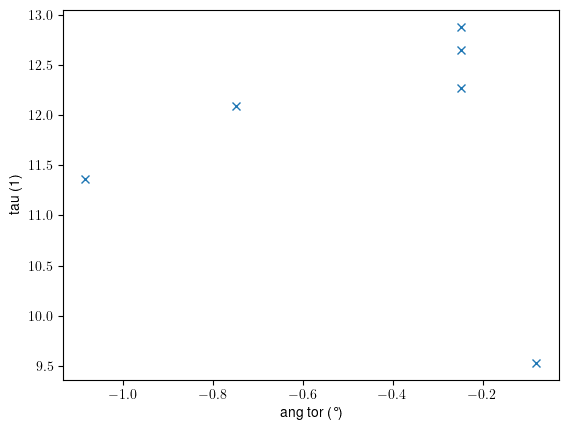

In [7]:
#grafico de tau vs toroidal
def tau_vs_toroidal(ruta, a) : 
    import os #manejo de archivos
    tau = []
    tor_total = []
    archivos_PC = os.listdir(ruta) #directorio con archivos de porcentaje de conversión
    archivos_PC.sort() #acomoda en órden alfabético
    for iArchivo in archivos_PC:
        #se obtiene la ruta del archivo
        ruta_archivo = PurePath(Path(ruta), Path(iArchivo))
        pol, tor, w0, R = np.loadtxt(ruta_archivo, delimiter='\t', skiprows=1, usecols=(0, 1, 2, 3), unpack=True)
        ancho = np.unique(w0)[:-1] #se elimina el último indice 
        for i in range(0,3) :
            #Identifica índices que cumplen la condición R < 1
            indices = np.where( (R<1) & (ancho[i] == w0) )
            if np.any(indices) == False : #chequear matriz vacía en numpy
                print("matriz vacía")
                pass
            else: 
                pol1 = pol[indices]
                R1 = a*R[indices]
                tor1 = tor[indices]
                #Pares ordenados para interpolación
                par_angulos_total = np.stack((tor1,pol1), axis=1)
                grid_tor, grid_pol = np.mgrid[np.min(tor1):np.max(tor1):300j, np.min(pol1):np.max(pol1):300j] #malla
                ox_final = griddata(par_angulos_total, (1-R1)*100  , (grid_tor, grid_pol), method='cubic', fill_value = 0)
                maximo_ox = np.max(ox_final) #encontrar el máximo
                ind_max = np.where(ox_final == maximo_ox)
                
                tau.append(maximo_ox.tolist()) 
                tau_final = np.array(tau)
                tor_total.append(grid_tor[ind_max].tolist())
                tor_total_final = np.array(tor_total).reshape(-1)        
    
    #Interpolación 1D
    from scipy.interpolate import UnivariateSpline
    print(tau_final, tor_total_final[1:])
    plt.plot(tor_total_final[1:], tau_final[1:], 'x')
    plt.xlabel('ang tor (°)')
    plt.ylabel('tau (1)')
        

#tau_vs_toroidal('z=0n1.48', 1)
#tau_vs_toroidal('z=0n1.85', 1)
tau_vs_toroidal('B=0.975B0', 1)

matriz vacía
matriz vacía
[ 1.8799508   9.52927423 12.15962241 13.13378356 12.64614522 12.09406871
 11.36124456] [0.22073579 0.18060201 7.53846154 9.94648829 0.43478261 0.60869565
 0.60869565]


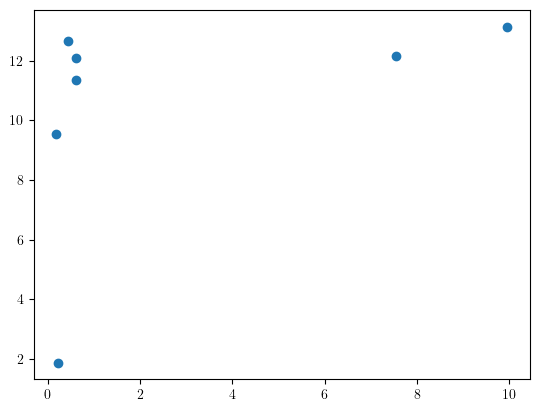

In [46]:
#grafico de tau vs poloidal
def tau_vs_poloidal(ruta, a) : 
    import os #manejo de archivos
    tau = []
    pol_total = []
    tor_total = []
    archivos_PC = os.listdir(ruta) #directorio con archivos de porcentaje de conversión
    archivos_PC.sort() #acomoda en órden alfabético
    for iArchivo in archivos_PC:
        #se obtiene la ruta del archivo
        ruta_archivo = PurePath(Path(ruta), Path(iArchivo))
        pol, tor, w0, R = np.loadtxt(ruta_archivo, delimiter='\t', skiprows=1, usecols=(0, 1, 2, 3), unpack=True)
        ancho = np.unique(w0)[:-1] #se elimina el último indice 
        for i in range(0,3) :
            #Identifica índices que cumplen la condición R < 1
            indices = np.where( (R<1) & (ancho[i] == w0) )
            if np.any(indices) == False : #chequear matriz vacía en numpy
                print("matriz vacía")
                pass
            else: 
                pol1 = pol[indices]
                R1 = a*R[indices]
                tor1 = tor[indices]
                #Pares ordenados para interpolación
                par_angulos_total = np.stack((tor1,pol1), axis=1)
                grid_tor, grid_pol = np.mgrid[np.min(tor1):np.max(tor1):300j, np.min(pol1):np.max(pol1):300j] #malla
                ox_final = griddata(par_angulos_total, (1-R1)*100  , (grid_tor, grid_pol), method='cubic', fill_value = 0)
                maximo_ox = np.max(ox_final) #encontrar el máximo
                ind_max = np.where(ox_final == maximo_ox)
                
                tau.append(maximo_ox.tolist()) 
                tau_final = np.array(tau)
                pol_total.append(grid_pol[ind_max].tolist())
                pol_total_final = np.array(pol_total).reshape(-1)
                tor_total.append(grid_tor[ind_max].tolist())
                tor_total_final = np.array(tor_total).reshape(-1) 
    
    print(tau_final, pol_total_final)
    plt.plot(pol_total_final, tau_final,  'o')
        
#tau_vs_poloidal('z=0n1.48', 1)
#tau_vs_poloidal('z=0n1.85', 1)
tau_vs_poloidal('B=0.975B0', 1)